In [26]:

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

np.random.seed(42)
n_points = 1000
xyz = np.random.randn(n_points, 3) * 10

center = np.array([0, 0, 0])
distances = np.linalg.norm(xyz - center, axis=1)
original_scalar_field = 10 * np.sin(distances * 0.5) + np.random.randn(n_points) * 2

print(f"Сгенерировано точек: {xyz.shape}")
print(f"Исходное скалярное поле (первые 5 значений): {original_scalar_field[:5]}")
print(f"Статистика исходного поля:")
print(f"  Среднее: {original_scalar_field.mean():.3f}")
print(f"  Минимум: {original_scalar_field.min():.3f}")
print(f"  Максимум: {original_scalar_field.max():.3f}")
print(f"  Стандартное отклонение: {original_scalar_field.std():.3f}")

def visualize_scalar_field(field, title, colorbar_title="Скалярное поле"):
    fig = go.Figure(data=[go.Scatter3d(
        x=xyz[:, 0],
        y=xyz[:, 1],
        z=xyz[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=field,
            colorscale='Viridis',
            colorbar=dict(title=colorbar_title),
            opacity=0.8
        )
    )])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        width=800,
        height=600
    )
    fig.show()

Сгенерировано точек: (1000, 3)
Исходное скалярное поле (первые 5 значений): [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Статистика исходного поля:
  Среднее: -0.190
  Минимум: -15.380
  Максимум: 15.597
  Стандартное отклонение: 7.494


Задание 1: Скалярное поле с постоянным значением 10
Первые 5 значений: [10. 10. 10. 10. 10.]


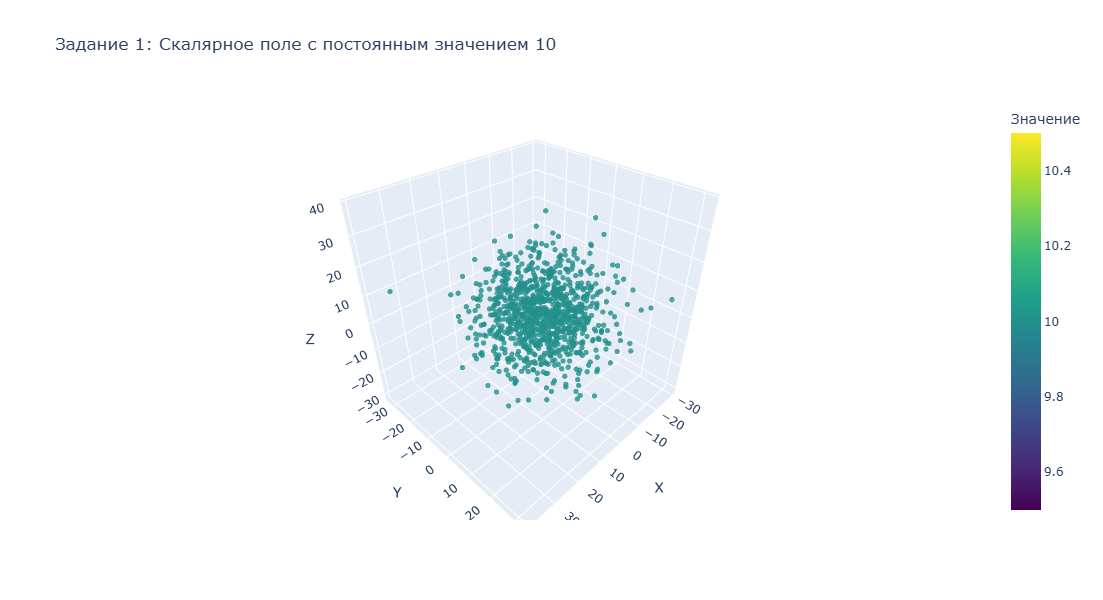

In [27]:
# Создаем новое скалярное поле с постоянным значением 10
constant_scalar_field = np.full(xyz.shape[0], 10.0)
print("Задание 1: Скалярное поле с постоянным значением 10")
print(f"Первые 5 значений: {constant_scalar_field[:5]}")

visualize_scalar_field(
    field=constant_scalar_field,
    title="Задание 1: Скалярное поле с постоянным значением 10",
    colorbar_title="Значение"
)

Задание 2: Исходное скалярное поле умножено на 2
Первые 5 значений исходного поля: [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Первые 5 значений после умножения: [-24.43551122  16.52135013   4.96477217 -10.44062843   9.46827065]


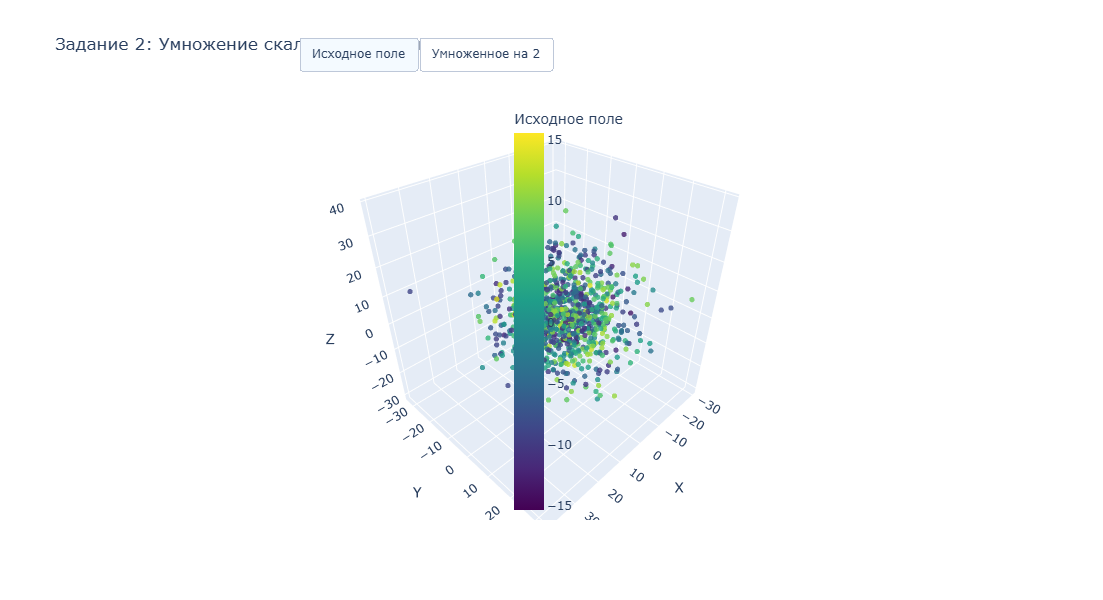

In [28]:
# Умножаем ИСХОДНОЕ поле на 2
multiplied_field = original_scalar_field * 2
print("Задание 2: Исходное скалярное поле умножено на 2")
print(f"Первые 5 значений исходного поля: {original_scalar_field[:5]}")
print(f"Первые 5 значений после умножения: {multiplied_field[:5]}")

# Визуализация с сравнением
fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Исходное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Умноженное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=multiplied_field,
        colorscale='Viridis',
        colorbar=dict(title='Умноженное поле', x=1.02),
        opacity=0.8
    ),
    name='Умноженное на 2',
    visible=False
))

buttons = [
    dict(label="Исходное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 2: Исходное скалярное поле"}]),
    dict(label="Умноженное на 2", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 2: Поле умноженное на 2"}])
]

fig.update_layout(
    title='Задание 2: Умножение скалярного поля на 2',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 3: К исходному полю добавлено 5
Первые 5 значений исходного поля: [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Первые 5 значений после добавления: [-7.21775561 13.26067507  7.48238609 -0.22031421  9.73413532]


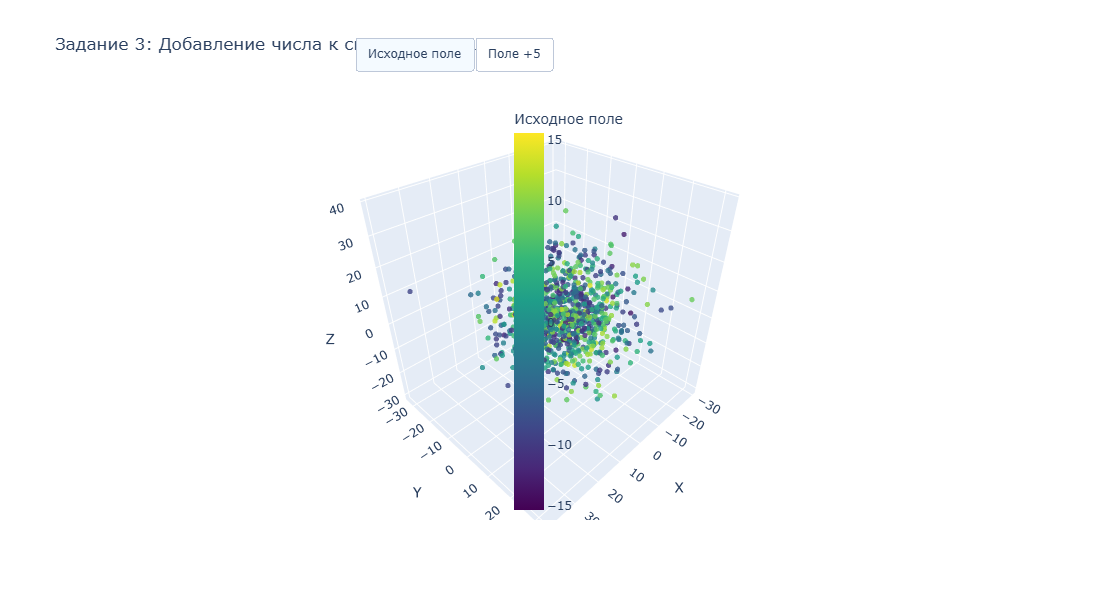

In [29]:
# Добавляем 5 к ИСХОДНОМУ полю
added_field = original_scalar_field + 5
print("Задание 3: К исходному полю добавлено 5")
print(f"Первые 5 значений исходного поля: {original_scalar_field[:5]}")
print(f"Первые 5 значений после добавления: {added_field[:5]}")

fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Исходное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Поле после добавления
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=added_field,
        colorscale='Viridis',
        colorbar=dict(title='Поле +5', x=1.02),
        opacity=0.8
    ),
    name='Поле +5',
    visible=False
))

buttons = [
    dict(label="Исходное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 3: Исходное поле"}]),
    dict(label="Поле +5", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 3: Исходное поле + 5"}])
]

fig.update_layout(
    title='Задание 3: Добавление числа к скалярному полю',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 4: К исходному полю применен гауссов фильтр (σ=2)
Первые 5 значений исходного поля: [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Первые 5 значений после сглаживания: [-2.06366972 -1.51881764 -0.97780394 -0.90839684 -1.25591071]


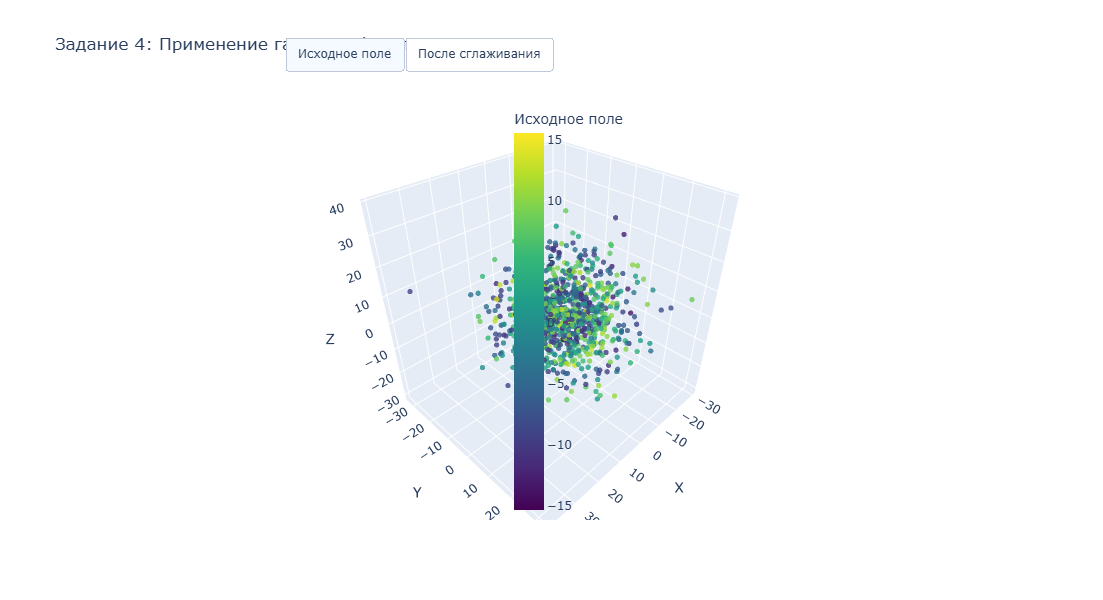

In [30]:
# Применяем гауссов фильтр к ИСХОДНОМУ полю
smoothed_field = gaussian_filter1d(original_scalar_field, sigma=2)
print("Задание 4: К исходному полю применен гауссов фильтр (σ=2)")
print(f"Первые 5 значений исходного поля: {original_scalar_field[:5]}")
print(f"Первые 5 значений после сглаживания: {smoothed_field[:5]}")

fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Исходное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Сглаженное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=smoothed_field,
        colorscale='Viridis',
        colorbar=dict(title='Сглаженное поле', x=1.02),
        opacity=0.8
    ),
    name='После гауссова фильтра',
    visible=False
))

buttons = [
    dict(label="Исходное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 4: Исходное поле"}]),
    dict(label="После сглаживания", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 4: После гауссова фильтра (σ=2)"}])
]

fig.update_layout(
    title='Задание 4: Применение гауссова фильтра',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 5: Вычислен градиент исходного поля
Первые 5 значений градиента: [20.47843068  7.35007085 -6.74049464  1.12587462 -0.11494461]


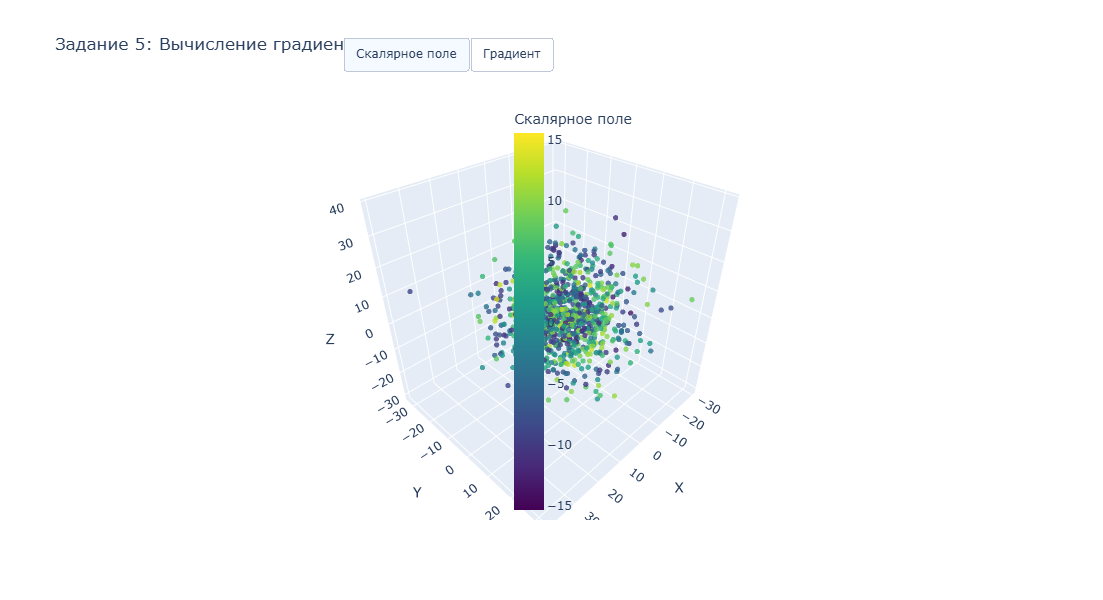

In [31]:
# Вычисляем градиент ИСХОДНОГО поля
gradient = np.gradient(original_scalar_field)
print("Задание 5: Вычислен градиент исходного поля")
print(f"Первые 5 значений градиента: {gradient[:5]}")

fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Скалярное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Градиент
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=gradient,
        colorscale='RdBu',
        colorbar=dict(title='Градиент', x=1.02),
        opacity=0.8
    ),
    name='Градиент',
    visible=False
))

buttons = [
    dict(label="Скалярное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 5: Исходное скалярное поле"}]),
    dict(label="Градиент", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 5: Градиент скалярного поля"}])
]

fig.update_layout(
    title='Задание 5: Вычисление градиента',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

In [32]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Применяем скользящее среднее к ИСХОДНОМУ полю
ma_smoothed = moving_average(original_scalar_field, window_size=5)
print("Задание 6: К исходному полю применено скользящее среднее (окно=5)")
print(f"Первые 5 значений исходного поля: {original_scalar_field[:5]}")
print(f"Первые 5 значений после сглаживания: {ma_smoothed[:5]}")

fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Исходное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Поле после скользящего среднего
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=ma_smoothed,
        colorscale='Viridis',
        colorbar=dict(title='Сглаженное поле', x=1.02),
        opacity=0.8
    ),
    name='После скользящего среднего',
    visible=False
))

buttons = [
    dict(label="Исходное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 6: Исходное поле"}]),
    dict(label="После сглаживания", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 6: После скользящего среднего (окно=5)"}])
]

fig.update_layout(
    title='Задание 6: Сглаживание скользящим средним',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 6: К исходному полю применено скользящее среднее (окно=5)
Первые 5 значений исходного поля: [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Первые 5 значений после сглаживания: [-0.29493889 -1.33900173 -0.39217467  0.96133576 -2.47449889]


Задание 7: Исходное поле преобразовано в RGB цвета
Цвета RGB (первые 5 строк):
[[0.28229  0.145912 0.46151 ]
 [0.395174 0.797475 0.367757]
 [0.123444 0.636809 0.528763]
 [0.1941   0.399323 0.555565]
 [0.185783 0.704891 0.485273]]


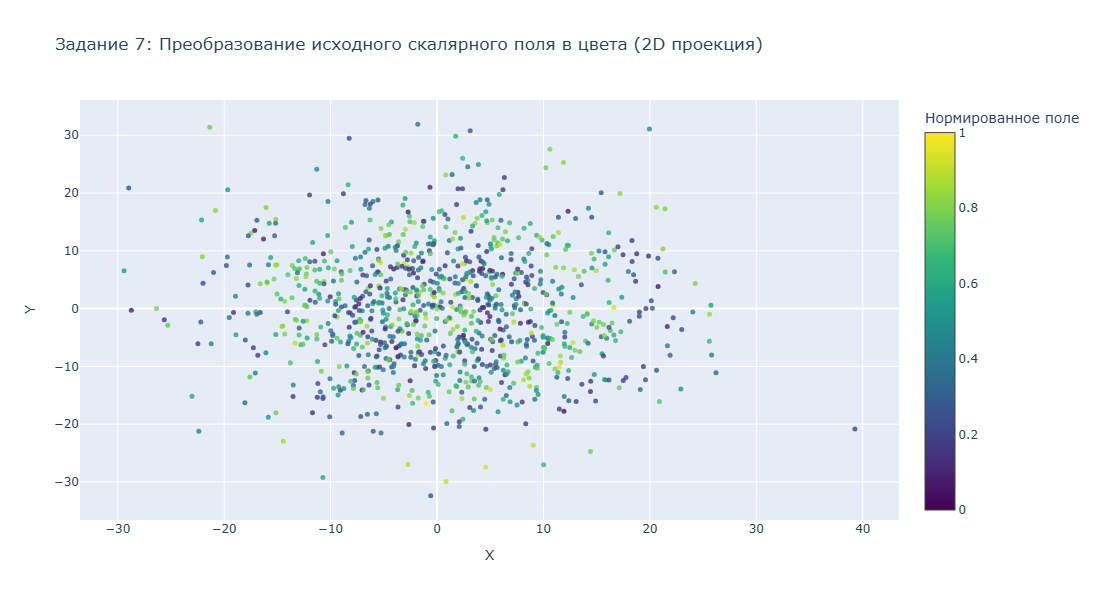


Использована цветовая карта: Viridis
Минимальное значение исходного поля: -15.380006179532447
Максимальное значение исходного поля: 15.596608688992456


In [33]:
# Преобразуем ИСХОДНОЕ поле в RGB цвета
normed = (original_scalar_field - original_scalar_field.min()) / (original_scalar_field.max() - original_scalar_field.min())
colors = plt.cm.viridis(normed)[:, :3]
print("Задание 7: Исходное поле преобразовано в RGB цвета")
print(f"Цвета RGB (первые 5 строк):\n{colors[:5]}")

# Визуализация
fig = go.Figure(data=go.Scatter(
    x=xyz[:, 0],
    y=xyz[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=normed,
        colorscale='Viridis',
        colorbar=dict(title='Нормированное поле'),
        opacity=0.8
    ),
    text=[f"Значение: {val:.3f}<br>Цвет: ({r:.2f}, {g:.2f}, {b:.2f})" 
          for val, (r, g, b) in zip(original_scalar_field, colors)],
    hoverinfo='text+x+y'
))

fig.update_layout(
    title='Задание 7: Преобразование исходного скалярного поля в цвета (2D проекция)',
    xaxis_title='X',
    yaxis_title='Y',
    width=800,
    height=600
)
fig.show()

# Показываем палитру
print("\nИспользована цветовая карта: Viridis")
print("Минимальное значение исходного поля:", original_scalar_field.min())
print("Максимальное значение исходного поля:", original_scalar_field.max())

In [34]:
# Нормализуем ИСХОДНОЕ поле
normalized_field = (original_scalar_field - min_val) / (max_val - min_val)
print("Задание 9: Исходное поле нормализовано в диапазон [0, 1]")
print(f"Первые 5 значений исходного поля: {original_scalar_field[:5]}")
print(f"Первые 5 значений после нормализации: {normalized_field[:5]}")
print(f"Минимум после нормализации: {normalized_field.min():.6f}")
print(f"Максимум после нормализации: {normalized_field.max():.6f}")

fig = go.Figure()

# Исходное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=original_scalar_field,
        colorscale='Viridis',
        colorbar=dict(title='Исходное поле', x=0.45),
        opacity=0.8
    ),
    name='Исходное поле',
    visible=True
))

# Нормализованное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=normalized_field,
        colorscale='Viridis',
        colorbar=dict(title='Нормализованное поле', x=1.02),
        opacity=0.8
    ),
    name='Нормализованное поле',
    visible=False
))

buttons = [
    dict(label="Исходное поле", method="update",
         args=[{"visible": [True, False]},
               {"title": "Задание 9: Исходное поле"}]),
    dict(label="Нормализованное", method="update",
         args=[{"visible": [False, True]},
               {"title": "Задание 9: Нормализованное поле [0, 1]"}])
]

fig.update_layout(
    title='Задание 9: Нормализация скалярного поля',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 9: Исходное поле нормализовано в диапазон [0, 1]
Первые 5 значений исходного поля: [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Первые 5 значений после нормализации: [-2.72177556 -0.67393249 -1.25176139 -2.02203142 -1.02658647]
Минимум после нормализации: -3.038001
Максимум после нормализации: 0.059661


In [35]:
# Создаем копию ИСХОДНОГО поля с искусственными пропусками
np.random.seed(42)
missing_indices = np.random.choice(len(original_scalar_field), size=50, replace=False)
field_with_nan = original_scalar_field.copy().astype(float)
field_with_nan[missing_indices] = np.nan

print(f"Задание 10: Создано {len(missing_indices)} пропусков (NaN) в исходном поле")
print(f"Количество NaN: {np.isnan(field_with_nan).sum()}")

# Интерполяция
def interpolate_nan(data):
    nans = np.isnan(data)
    x = np.arange(len(data))
    interp_func = interp1d(x[~nans], data[~nans], 
                          bounds_error=False, fill_value="extrapolate")
    return interp_func(x)

interpolated_field = interpolate_nan(field_with_nan)
print("После интерполяции (первые 5 значений):", interpolated_field[:5])
print(f"Количество NaN после интерполяции: {np.isnan(interpolated_field).sum()}")

fig = go.Figure()

# Поле с пропусками (NaN отображаются как белые точки)
colors_with_nan = field_with_nan.copy()
colors_with_nan[np.isnan(colors_with_nan)] = np.nanmean(field_with_nan)  # для отображения

fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=colors_with_nan,
        colorscale='Viridis',
        colorbar=dict(title='Поле с пропусками', x=0.45),
        opacity=0.8,
        cmin=original_scalar_field.min(),
        cmax=original_scalar_field.max()
    ),
    name='С пропусками',
    visible=True
))

# Интерполированное поле
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=interpolated_field,
        colorscale='Viridis',
        colorbar=dict(title='Интерполированное поле', x=1.02),
        opacity=0.8
    ),
    name='После интерполяции',
    visible=False
))

# Отмечаем точки с пропусками
nan_points = xyz[np.isnan(field_with_nan)]
fig.add_trace(go.Scatter3d(
    x=nan_points[:, 0],
    y=nan_points[:, 1],
    z=nan_points[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        symbol='x'
    ),
    name='Пропуски (NaN)',
    visible=True
))

buttons = [
    dict(label="С пропусками", method="update",
         args=[{"visible": [True, False, True]},
               {"title": "Задание 10: Поле с пропусками (красные X - NaN)"}]),
    dict(label="После интерполяции", method="update",
         args=[{"visible": [False, True, False]},
               {"title": "Задание 10: После интерполяции пропусков"}])
]

fig.update_layout(
    title='Задание 10: Интерполяция пропусков в исходном поле',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    width=900, height=600,
    updatemenus=[dict(type="buttons", direction="right",
                      x=0.5, y=1.15, buttons=buttons)]
)
fig.show()

Задание 10: Создано 50 пропусков (NaN) в исходном поле
Количество NaN: 50
После интерполяции (первые 5 значений): [-12.21775561   8.26067507   2.48238609  -5.22031421   4.73413532]
Количество NaN после интерполяции: 0


In [36]:
# Фильтруем ИСХОДНОЕ поле по диапазону значений
# Выбираем диапазон вокруг среднего значения ± одно стандартное отклонение
lower_bound = original_scalar_field.mean() - original_scalar_field.std()
upper_bound = original_scalar_field.mean() + original_scalar_field.std()

mask = (original_scalar_field >= lower_bound) & (original_scalar_field <= upper_bound)
filtered_points = xyz[mask]
filtered_scalar = original_scalar_field[mask]

print(f"Задание 11: Фильтрация исходного поля в диапазоне [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"  Диапазон: среднее ± σ = {original_scalar_field.mean():.2f} ± {original_scalar_field.std():.2f}")
print(f"  Отфильтровано точек: {len(filtered_points)} из {len(xyz)}")
print(f"  Процент отфильтрованных точек: {len(filtered_points)/len(xyz)*100:.1f}%")

# Визуализация
fig = go.Figure()

# Все точки (полупрозрачные)
fig.add_trace(go.Scatter3d(
    x=xyz[:, 0],
    y=xyz[:, 1],
    z=xyz[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color='lightgray',
        opacity=0.2
    ),
    name='Все точки',
    visible=True
))

# Отфильтрованные точки
fig.add_trace(go.Scatter3d(
    x=filtered_points[:, 0],
    y=filtered_points[:, 1],
    z=filtered_points[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=filtered_scalar,
        colorscale='Viridis',
        colorbar=dict(title='Скалярное поле'),
        opacity=0.8
    ),
    name='Отфильтрованные точки',
    visible=True
))

# Границы диапазона (виртуальные плоскости)
x_range = [xyz[:, 0].min(), xyz[:, 0].max()]
y_range = [xyz[:, 1].min(), xyz[:, 1].max()]

fig.update_layout(
    title=f'Задание 11: Фильтрация по диапазону [{lower_bound:.2f}, {upper_bound:.2f}]<br>Отфильтровано: {len(filtered_points)} точек',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        xaxis=dict(range=x_range),
        yaxis=dict(range=y_range)
    ),
    width=800,
    height=600
)
fig.show()

Задание 11: Фильтрация исходного поля в диапазоне [-7.68, 7.30]
  Диапазон: среднее ± σ = -0.19 ± 7.49
  Отфильтровано точек: 549 из 1000
  Процент отфильтрованных точек: 54.9%
